In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

# Random seed for reproducibility
seed = 69

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

df = pd.read_csv('Training.csv')
print(df.shape)
print(df.head())

# Normalize dataset
test_size = int(df.shape[0]/10)
X_train_raw = df.iloc[:-test_size]
# y_train_raw = y.iloc[:-test_size]
X_test_raw = df.iloc[-test_size:]
# y_test_raw = y.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize both features and labels, LO FACCIO SUL DATASET COMPLETO -------------------------------------------------------
X_min = df.min()
X_max = df.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

2.7.0


FileNotFoundError: ignored

In [ ]:
# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Sponginess'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim(-100,10000)

plt.title("Sponginess Fourier transform")
plt.xlabel('Frequency')
plt.show()

# Reconstruction of signal with dominating frequencies
from scipy import real

# This function does the inverse fourier transform (series)
def f(Y,x, N):
    total = 0
    for ctr in np.argsort(abs_values)[-10:]: # I take only the best 10 frequencies
        total += Y[ctr] * (np.cos(x*ctr*2*np.pi/N) + 1j*np.sin(x*ctr*2*np.pi/N))
    return real(total)

fft = tf.signal.rfft(X_train_raw['Sponginess'])
Y=fft
N=len(Y)

# Number of datapoints to recreate using the frequencies (could be > N if 
# we want to predict points in the future)
# The fourier reconstruction is half the size due to max sampling frequency
xs = range(N)
Y_raw = [f(Y, x, N) for x in xs]
Y_normalized = Y_raw / X_max['Sponginess']
# Plot the reconstruction
plt.plot(xs, [f(Y, x, N) for x in xs])
plt.show()

# Show original graph
plt.plot(X_train_raw.Sponginess)
plt.show()

NameError: ignored

Dominating frequencies: [   6  639 1284    5    4 1285    1  642  643    0]
With coefficients: [  594.7597    664.3098    681.3319    792.52026  1094.8529   1429.5786
  1720.5588   2487.3037   2739.3098  40142.03   ]


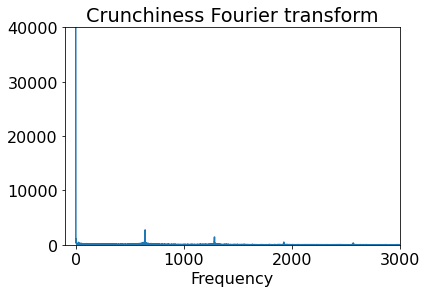

In [ ]:
# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Crunchiness'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
print("With coefficients: {}".format(np.sort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim(-100,3000)

plt.title("Crunchiness Fourier transform")
_ = plt.xlabel('Frequency')

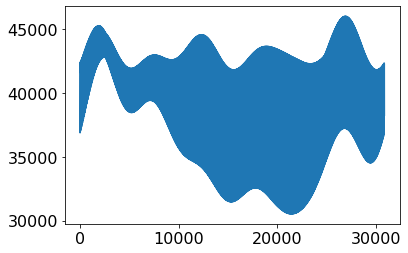

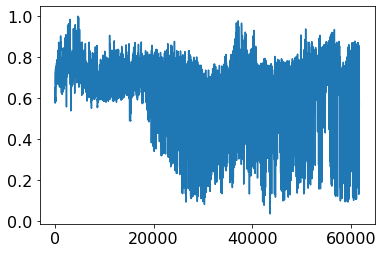

In [ ]:
# Reconstruction of signal with dominating frequencies
from scipy import real

# This function does the inverse fourier transform (series)
def f(Y,x, N):
    total = 0
    for ctr in np.argsort(abs_values)[-10:]: # I take only the best 10 frequencies
        total += Y[ctr] * (np.cos(x*ctr*2*np.pi/N) + 1j*np.sin(x*ctr*2*np.pi/N))
    return real(total)

fft = tf.signal.rfft(X_train_raw['Crunchiness'])
Y=fft
N=len(Y)

# Number of datapoints to recreate using the frequencies (could be > N if 
# we want to predict points in the future)
# The fourier reconstruction is half the size due to max sampling frequency
xs = range(N)

# Plot the reconstruction
plt.plot(xs, [f(Y, x, N) for x in xs])
plt.show()

# Show original graph
plt.plot(X_train_raw.Crunchiness)
plt.show()


Dominating frequencies: [   6  639    5 1284    4 1285    1  642  643    0]


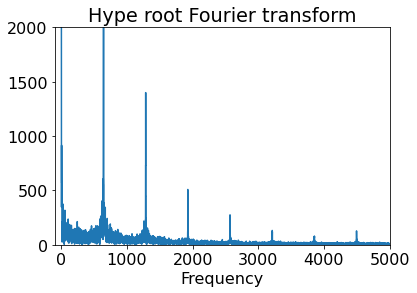

In [ ]:
# Fast fourier transform

# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Hype root'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim(-100,5000)

plt.title("Hype root Fourier transform")
_ = plt.xlabel('Frequency')

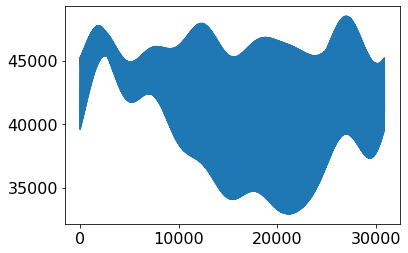

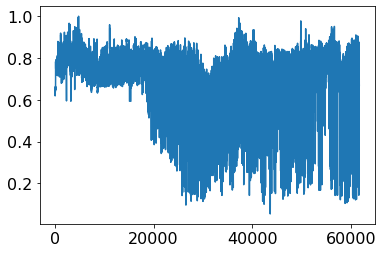

In [ ]:
# Reconstruction of signal with dominating frequencies
from scipy import real

# This function does the inverse fourier transform (series)
def f(Y,x, N):
    total = 0
    for ctr in np.argsort(abs_values)[-10:]: # I take only the best 10 frequencies
        total += Y[ctr] * (np.cos(x*ctr*2*np.pi/N) + 1j*np.sin(x*ctr*2*np.pi/N))
    return real(total)

fft = tf.signal.rfft(X_train_raw['Hype root'])
abs_values = np.abs(fft)
Y=fft
N=len(Y)

# Number of datapoints to recreate using the frequencies (could be > N if 
# we want to predict points in the future)
# The fourier reconstruction is half the size due to max sampling frequency
xs = range(N)

# Plot the reconstruction
plt.plot(xs, [f(Y, x, N) for x in xs])
plt.show()

# Show original graph
plt.plot(X_train_raw['Hype root'].values)
plt.show()

Dominating frequencies: [ 643    8    9   12 1285  642    2    3    1    0]


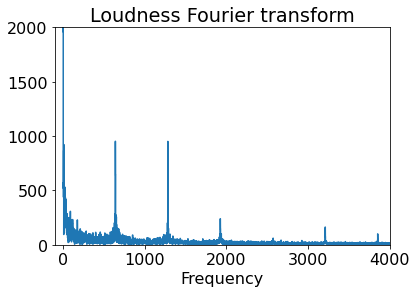

In [ ]:
# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Loudness on impact'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim(-100,4000)

plt.title("Loudness Fourier transform")
_ = plt.xlabel('Frequency')

Dominating frequencies: [11 13 14  2  1  6  5  8  3  0]


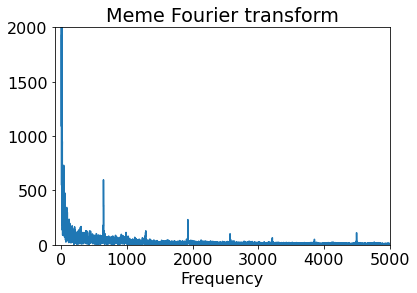

In [ ]:
# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Meme creativity'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim(-100,5000)

plt.title("Meme Fourier transform")
_ = plt.xlabel('Frequency')

Dominating frequencies: [12  9  6  7  5  1  4  3  2  0]


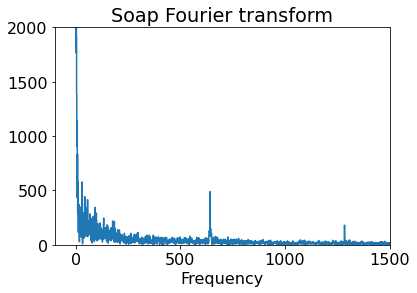

In [ ]:
# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Soap slipperiness'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim(-100,1500)

plt.title("Soap Fourier transform")
_ = plt.xlabel('Frequency')

Dominating frequencies: [   9  643   12 1285  642    8    3    2    1    0]


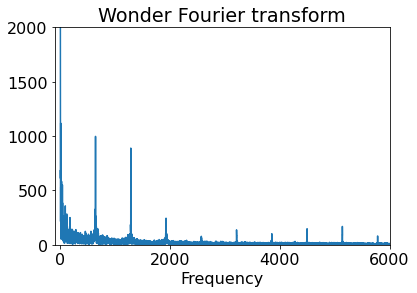

In [ ]:
# Fast fourier transform

fft = tf.signal.rfft(X_train_raw['Wonder level'])
f_per_dataset = np.arange(0, len(fft))

abs_values = np.abs(fft)
print("Dominating frequencies: {}".format(np.argsort(abs_values)[-10:]))
plt.step(f_per_dataset, abs_values)
#plt.xscale('log')
plt.ylim(0, 2000)
plt.xlim(-100,6000)

plt.title("Wonder Fourier transform")
_ = plt.xlabel('Frequency')